## Install Libraries

In [1]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 321 kB 4.8 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=11515166d0da02a394be09f7013ff501fdab34721fcf4d23e1046ac2c4763330
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.43-py3-none-any.whl size=319231 sha256=356e7fe9e75412eb8304bb6b03965a53b87f7e8149322d22e65b797f957e419a
  Stored in directory: /root/.cache/pip/wheels/71/d5/dd/d4893fffb9dcb9494de70478ab9728ae5d105f7d849a90e81a
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=49a2128965b581c9bf3bdfc5e3e6ca44cc4619f07d5dc4baedd008e7b1e2fc9e
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successful

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import re

from keras.layers import Input, Conv1D, Dense, Embedding, Dropout, Flatten, MaxPooling1D
from keras import backend as K
from keras.models import Model, Sequential
from keras.preprocessing import text, sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from plot_keras_history import plot_history
from sklearn.model_selection import train_test_split
from IPython.display import SVG
from keras.utils import vis_utils


## Reading the pre-processed csv file

In [3]:
from google.colab import drive
drive.mount("/content/MyDrive/")

Mounted at /content/MyDrive/


In [4]:
preprocessed_data = pd.read_csv('/content/MyDrive/MyDrive/Project/train-balanced-sarcasm-preprocessed.csv',sep = ',')
preprocessed_data.shape

(50000, 3)

In [5]:
preprocessed_data['label'].value_counts()

0    25000
1    25000
Name: label, dtype: int64

# **Let's perform CNN for 'comment'**

## Reading Inputs for the model

In [ ]:
EMBED_SIZE = 50
max_length = 1000
VOCAB_SIZE = 10000

filters = 32
kernel_size = 3
hidden_dims = 250

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data['comment'], preprocessed_data['label'], test_size=0.2, random_state=42)

tokenizer = text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

## Building the Model

In [ ]:
cnn_model = Sequential()
cnn_model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=max_length))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(filters, kernel_size,padding = 'valid', activation = 'relu'))
cnn_model.add(MaxPooling1D())
cnn_model.add(Conv1D(filters, kernel_size,padding = 'valid', activation = 'relu'))
cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(hidden_dims, activation ='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 50)          500000    
                                                                 
 dropout_2 (Dropout)         (None, 1000, 50)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 998, 32)           4832      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 499, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 497, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 248, 32)          0         
 1D)                                                  

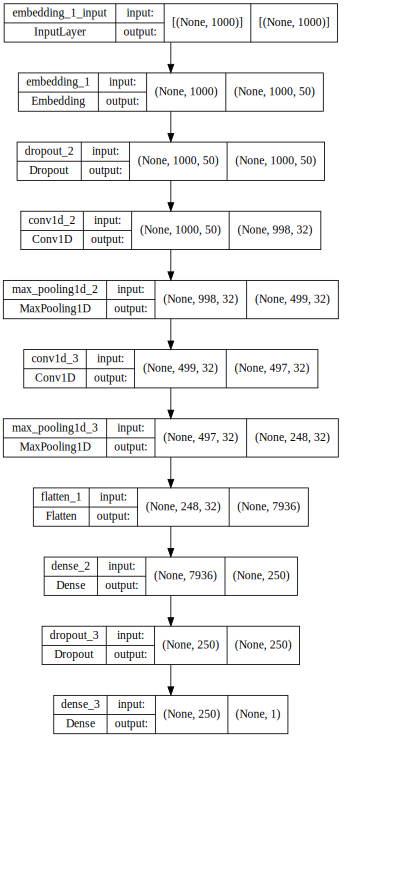

In [ ]:
SVG(vis_utils.model_to_dot(cnn_model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))  

## Train the Model

In [ ]:
cnn_history = cnn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 128, verbose=1)

Epoch 1/10
313/313 [==============================] - 17s 17ms/step - loss: 0.6790 - accuracy: 0.5599 - val_loss: 0.6374 - val_accuracy: 0.6489
Epoch 2/10
313/313 [==============================] - 5s 16ms/step - loss: 0.6197 - accuracy: 0.6568 - val_loss: 0.6157 - val_accuracy: 0.6660
Epoch 3/10
313/313 [==============================] - 5s 15ms/step - loss: 0.5762 - accuracy: 0.6994 - val_loss: 0.6243 - val_accuracy: 0.6559
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 0.5355 - accuracy: 0.7286 - val_loss: 0.6438 - val_accuracy: 0.6541
Epoch 5/10
313/313 [==============================] - 5s 16ms/step - loss: 0.4984 - accuracy: 0.7541 - val_loss: 0.6785 - val_accuracy: 0.6474
Epoch 6/10
313/313 [==============================] - 5s 16ms/step - loss: 0.4683 - accuracy: 0.7695 - val_loss: 0.7066 - val_accuracy: 0.6434
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 0.4402 - accuracy: 0.7856 - val_loss: 0.7480 - val_accuracy: 0.639

## Visualize the model plot

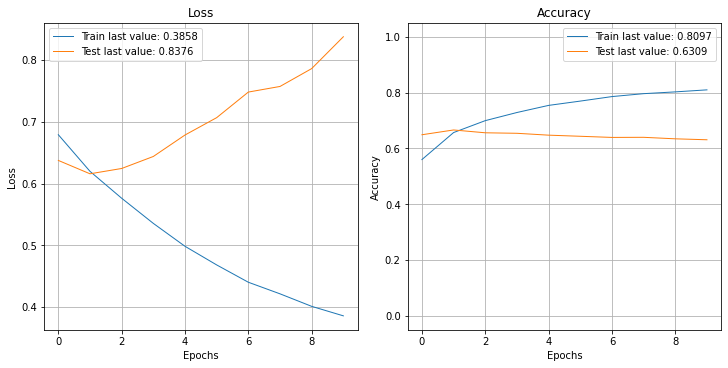

In [ ]:
plot_history(cnn_history.history, path="standard_comment_cnn_1.png")
plt.show()

## Evaluate the model

In [ ]:
cnn_results = cnn_model.evaluate(X_test, y_test, batch_size=128)
print('test_loss:', cnn_results[0], 'test_accuracy:', cnn_results[1])

79/79 [==============================] - 0s 6ms/step - loss: 0.8376 - accuracy: 0.6309
test_loss: 0.8375615477561951 test_accuracy: 0.6309000253677368


In [ ]:
preprocessed_data[preprocessed_data['label']==1].sample(10)

,label,comment,parent_comment
36483,1,the government needs to invest in games like t...,do not let pavee point see this.
26863,1,just wait until tomorrow to install it then,i thought os updates were on tuesdays...wth ap...
31097,1,"yes , definitely working like a game that was ...","welcome to the 5th season of our beta , do not..."
28787,1,i am being sarcastic.,can not tell if this post is sarcastic or mons...
49524,1,pleb..still using a phone to call people,"my phone , it is from 2012 and cost around $12..."
33721,1,meh frankenstein is not important.,mary shelley is also missing.
48794,1,asexuality is the one true sexuality and all e...,"bisexuals , heterosexuals , homosexuals... are..."
29648,1,i wish my build could look like that.,is this really the best stock image they could...
36154,1,this appears to be a floyd rose,what is this and is there an easy fix ?
27157,1,him ?,dudes a pornstar. what do you think ?


In [ ]:
preprocessed_data[preprocessed_data['label']==0].sample(10)

,label,comment,parent_comment
8505,0,it should be a rule that only verified users m...,maybe they could make a rule that only verifie...
3822,0,"what , is it , weird , for one , sentence , to...",kinda like you with punctuation ?
11484,0,a childish clown can exist.,clown or child can not be both : )
22542,0,we can only assume so,so the stream is going to reveal the last rema...
21076,0,he was the chosen one,obiwankenobinoooooooo.gif
14992,0,i am jealous of anyone who has the ability to ...,it is already one hell of a cosign to be prais...
18826,0,except for that one wall comp that james rocks at,well everyone in the house is better at comps.
10968,0,in 2 and a bit month ' s everyone will be aski...,just realized the hand holding deshret ' s spi...
24338,0,i imagine the first human interaction with bro...,broccoli is confusing
22437,0,"i havent even seen it , but in context - his w...",hendersons was much better


### *Predicting the probability of sentence being sarcastic*

In [ ]:
# Case 1 : Universal statement
sent1 = "sun sets in the west"
sent1 = tokenizer.texts_to_sequences([sent1])
sent1 = pad_sequences(sent1, maxlen = max_length)

prediction = cnn_model.predict(sent1)
print("The probability of sent1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent1 being sarcastic is 31.422 percent


In [ ]:
# Case 2 : Non-Sarcastic statement 
sent2 = "totally untrue. hong kong english sucks."           # passing a value from parent_comment column
sent2 = tokenizer.texts_to_sequences([sent2])
sent2 = pad_sequences(sent2, maxlen = max_length)

prediction = cnn_model.predict(sent2)
print("The probability of sent2 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent2 being sarcastic is 88.537 percent


In [ ]:
# Case 2 : Non-Sarcastic statement 
sent2_1 = "guess you have not heard malaysian or filipino english."      # passing a value from comment column
sent2_1 = tokenizer.texts_to_sequences([sent2_1])
sent2_1 = pad_sequences(sent2_1, maxlen = max_length)

prediction = cnn_model.predict(sent2_1)
print("The probability of sent2_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent2_1 being sarcastic is 41.830 percent


In [ ]:
# Case 3 : Sarcastic statement statement
sent3 = "5s teams and 3s teams names are swapped with each other"             # passing a value from parent_comment column
sent3 = tokenizer.texts_to_sequences([sent3])
sent3 = pad_sequences(sent3, maxlen = max_length)

prediction = cnn_model.predict(sent3)
print("The probability of sent3 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent3 being sarcastic is 6.326 percent


In [ ]:
# Case 3 : Sarcastic statement statement
sent3_1 = "not even riot cares about ranked teams"           # passing a value from comment column
sent3_1 = tokenizer.texts_to_sequences([sent3_1])
sent3_1 = pad_sequences(sent3_1, maxlen = max_length)

prediction = cnn_model.predict(sent3_1)
print("The probability of sent3_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent3_1 being sarcastic is 93.118 percent


# **Let's perform CNN for 'parent_comment'**

## Reading Inputs for the model

In [ ]:
EMBED_SIZE = 50
max_length = 1000
VOCAB_SIZE = 10000

filters = 32
kernel_size = 3
hidden_dims = 250

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data['parent_comment'], preprocessed_data['label'], test_size=0.2, random_state=42)

tokenizer = text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

## Building the Model

In [ ]:
cnn_model_parent = Sequential()
cnn_model_parent.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=max_length))
cnn_model_parent.add(Dropout(.5))
cnn_model_parent.add(Conv1D(filters, kernel_size,padding = 'valid', activation = 'relu'))
cnn_model_parent.add(MaxPooling1D())
cnn_model_parent.add(Conv1D(filters, kernel_size,padding = 'valid', activation = 'relu'))
cnn_model_parent.add(MaxPooling1D())
cnn_model_parent.add(Flatten())
cnn_model_parent.add(Dense(hidden_dims, activation ='relu'))
cnn_model_parent.add(Dropout(.5))
cnn_model_parent.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn_model_parent.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model_parent.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 50)          500000    
                                                                 
 dropout_4 (Dropout)         (None, 1000, 50)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 998, 32)           4832      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 499, 32)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 497, 32)           3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 248, 32)          0         
 1D)                                                  

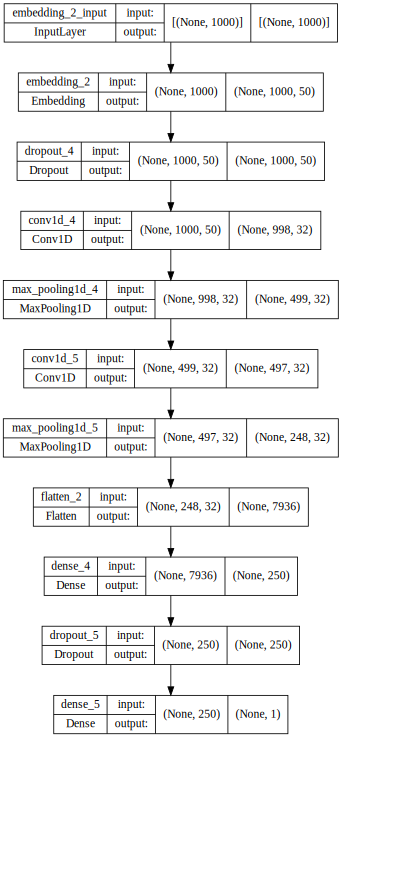

In [ ]:
SVG(vis_utils.model_to_dot(cnn_model_parent, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))  

## Train the model

In [ ]:
cnn_history_parent = cnn_model_parent.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 128, verbose=1)

Epoch 1/10
313/313 [==============================] - 150s 475ms/step - loss: 0.6930 - accuracy: 0.5112 - val_loss: 0.6904 - val_accuracy: 0.5366
Epoch 2/10
313/313 [==============================] - 153s 489ms/step - loss: 0.6769 - accuracy: 0.5770 - val_loss: 0.6855 - val_accuracy: 0.5512
Epoch 3/10
313/313 [==============================] - 130s 412ms/step - loss: 0.6431 - accuracy: 0.6302 - val_loss: 0.6967 - val_accuracy: 0.5439
Epoch 4/10
313/313 [==============================] - 121s 388ms/step - loss: 0.6064 - accuracy: 0.6655 - val_loss: 0.7151 - val_accuracy: 0.5378
Epoch 5/10
313/313 [==============================] - 120s 384ms/step - loss: 0.5651 - accuracy: 0.6983 - val_loss: 0.7720 - val_accuracy: 0.5340
Epoch 6/10
313/313 [==============================] - 120s 384ms/step - loss: 0.5219 - accuracy: 0.7258 - val_loss: 0.7849 - val_accuracy: 0.5334
Epoch 7/10
313/313 [==============================] - 120s 385ms/step - loss: 0.4873 - accuracy: 0.7500 - val_loss: 0.8503 -

## Visualize the model plot

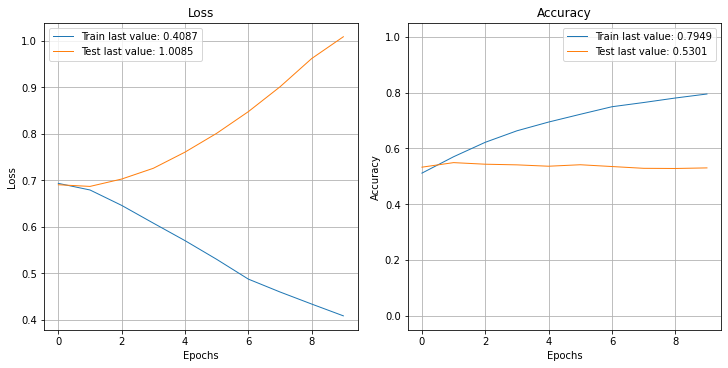

In [ ]:
plot_history(cnn_history_parent.history, path="standard_parent_comment_cnn_1.png")
plt.show()

## Evaluate the model

In [ ]:
cnn_results_parent = cnn_model_parent.evaluate(X_test, y_test, batch_size=128)
print('test_loss:', cnn_results_parent[0], 'test_accuracy:', cnn_results_parent[1])

79/79 [==============================] - 0s 6ms/step - loss: 1.0085 - accuracy: 0.5301
test_loss: 1.0085397958755493 test_accuracy: 0.5300999879837036


### *Predicting the probability of sentence being sarcastic*

In [ ]:
# Case 1 : Universal statement
sent4 = "sun sets in the west"
sent4 = tokenizer.texts_to_sequences([sent4])
sent4 = pad_sequences(sent4, maxlen = max_length)

prediction = cnn_model_parent.predict(sent4)
print("The probability of sent4 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent4 being sarcastic is 43.449 percent


In [ ]:
# Case 2 : Non-Sarcastic statement 
sent5 = "totally untrue. hong kong english sucks."           # passing a value from parent_comment column
sent5 = tokenizer.texts_to_sequences([sent5])
sent5 = pad_sequences(sent5, maxlen = max_length)

prediction = cnn_model_parent.predict(sent5)
print("The probability of sent5 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent5 being sarcastic is 8.933 percent


In [ ]:
# Case 2 : Non-Sarcastic statement 
sent5_1 = "guess you have not heard malaysian or filipino english."      # passing a value from comment column
sent5_1 = tokenizer.texts_to_sequences([sent5_1])
sent5_1 = pad_sequences(sent5_1, maxlen = max_length)

prediction = cnn_model_parent.predict(sent5_1)
print("The probability of sent5_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent5_1 being sarcastic is 37.955 percent


In [ ]:
# Case 3 : Sarcastic statement statement
sent6 = "5s teams and 3s teams names are swapped with each other"             # passing a value from parent_comment column
sent6 = tokenizer.texts_to_sequences([sent6])
sent6 = pad_sequences(sent6, maxlen = max_length)

prediction = cnn_model_parent.predict(sent6)
print("The probability of sent6 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent6 being sarcastic is 88.431 percent


In [ ]:
# Case 3 : Sarcastic statement statement
sent6_1 = "not even riot cares about ranked teams"           # passing a value from comment column
sent6_1 = tokenizer.texts_to_sequences([sent6_1])
sent6_1 = pad_sequences(sent6_1, maxlen = max_length)

prediction = cnn_model_parent.predict(sent6_1)
print("The probability of sent6_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent6_1 being sarcastic is 56.289 percent


# **Let's perform CNN for 'comment and parent_comment'**

## Reading Inputs for the model



> ### *Concatenating 'comment' and 'parent_comment'*



In [6]:
comments = preprocessed_data['comment']
parent_comments = preprocessed_data['parent_comment']
labels = preprocessed_data['label']

concat_comments = []
comm = ''
for i in range (len(parent_comments)):
    comm = comments[i] + ' <SEP> ' + parent_comments[i]
    if (comm != ''):
        concat_comments.append(comm)
        comm = ''

concat_comments = np.array(concat_comments)
concat_comments = pd.Series(concat_comments, copy=False)

In [7]:
EMBED_SIZE = 50
max_length = 1000
VOCAB_SIZE = 10000

filters = 32
kernel_size = 3
hidden_dims = 250
epochs = 10

In [8]:
X_train, X_test, y_train, y_test = train_test_split(concat_comments, preprocessed_data['label'], test_size=0.2, random_state=42)

tokenizer = text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

## Building the model

In [9]:
concat_cnn_model = Sequential()
concat_cnn_model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=max_length))
concat_cnn_model.add(Dropout(0.5))
concat_cnn_model.add(Conv1D(filters, kernel_size,padding = 'valid', activation = 'relu'))
concat_cnn_model.add(MaxPooling1D())
concat_cnn_model.add(Conv1D(filters, kernel_size,padding = 'valid', activation = 'relu'))
concat_cnn_model.add(MaxPooling1D())
concat_cnn_model.add(Flatten())
concat_cnn_model.add(Dense(hidden_dims, activation ='relu'))
concat_cnn_model.add(Dropout(0.5))
concat_cnn_model.add(Dense(1, activation='sigmoid'))

In [10]:
concat_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
concat_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 50)          500000    
                                                                 
 dropout (Dropout)           (None, 1000, 50)          0         
                                                                 
 conv1d (Conv1D)             (None, 998, 32)           4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 32)           3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 248, 32)          0         
 1D)                                                    

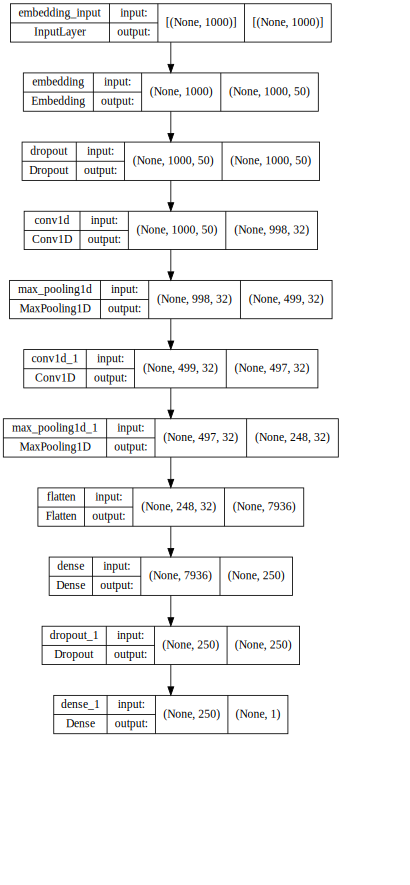

In [11]:
SVG(vis_utils.model_to_dot(concat_cnn_model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))  

## Train the model

In [12]:
concat_cnn_history = concat_cnn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 128, verbose=1)

Epoch 1/10
313/313 [==============================] - 20s 17ms/step - loss: 0.6821 - accuracy: 0.5515 - val_loss: 0.6443 - val_accuracy: 0.6314
Epoch 2/10
313/313 [==============================] - 5s 17ms/step - loss: 0.6203 - accuracy: 0.6564 - val_loss: 0.6186 - val_accuracy: 0.6581
Epoch 3/10
313/313 [==============================] - 6s 20ms/step - loss: 0.5699 - accuracy: 0.7042 - val_loss: 0.6262 - val_accuracy: 0.6607
Epoch 4/10
313/313 [==============================] - 6s 21ms/step - loss: 0.5286 - accuracy: 0.7399 - val_loss: 0.6255 - val_accuracy: 0.6610
Epoch 5/10
313/313 [==============================] - 7s 21ms/step - loss: 0.4885 - accuracy: 0.7699 - val_loss: 0.6658 - val_accuracy: 0.6488
Epoch 6/10
313/313 [==============================] - 5s 17ms/step - loss: 0.4475 - accuracy: 0.7925 - val_loss: 0.6946 - val_accuracy: 0.6475
Epoch 7/10
313/313 [==============================] - 5s 17ms/step - loss: 0.4105 - accuracy: 0.8124 - val_loss: 0.7384 - val_accuracy: 0.637

## Visualise the model plot

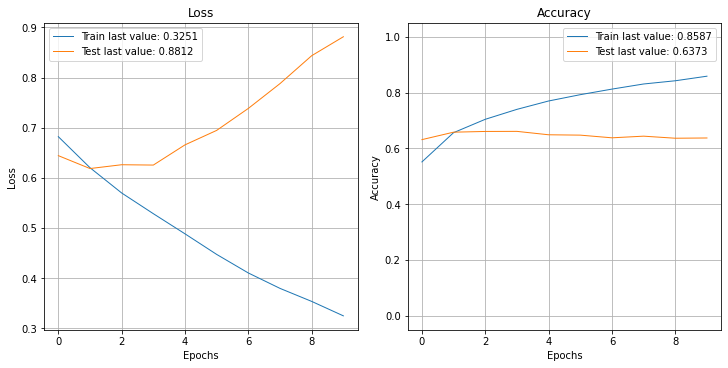

In [13]:
plot_history(concat_cnn_history.history, path="concat_standard_cnn.png")
plt.show()

## Evaluate the model

In [14]:
concat_cnn_results = concat_cnn_model.evaluate(X_test, y_test, batch_size=128)
print('test_loss:', concat_cnn_results[0], 'test_accuracy:', concat_cnn_results[1])

79/79 [==============================] - 1s 11ms/step - loss: 0.8812 - accuracy: 0.6373
test_loss: 0.8812196254730225 test_accuracy: 0.6373000144958496


### *Predicting the probability of sentence being sarcastic*

In [15]:
# Case 1 : Universal statement
sent7 = "sun sets in the west"
sent7 = tokenizer.texts_to_sequences([sent7])
sent7 = pad_sequences(sent7, maxlen = max_length)

prediction = concat_cnn_model.predict(sent7)
print("The probability of sent7 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent7 being sarcastic is 26.130 percent


In [16]:
# Case 2 : Non-Sarcastic statement 
sent8 = "totally untrue. hong kong english sucks."           # passing a value from parent_comment column
sent8 = tokenizer.texts_to_sequences([sent8])
sent8 = pad_sequences(sent8, maxlen = max_length)

prediction = concat_cnn_model.predict(sent8)
print("The probability of sent8 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent8 being sarcastic is 68.572 percent


In [17]:
# Case 2 : Non-Sarcastic statement 
sent8_1 = "guess you have not heard malaysian or filipino english."      # passing a value from comment column
sent8_1 = tokenizer.texts_to_sequences([sent8_1])
sent8_1 = pad_sequences(sent8_1, maxlen = max_length)

prediction = concat_cnn_model.predict(sent8_1)
print("The probability of sent8_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent8_1 being sarcastic is 27.941 percent


In [18]:
# Case 3 : Sarcastic statement statement
sent9 = "5s teams and 3s teams names are swapped with each other"             # passing a value from parent_comment column
sent9 = tokenizer.texts_to_sequences([sent9])
sent9 = pad_sequences(sent9, maxlen = max_length)

prediction = concat_cnn_model.predict(sent9)
print("The probability of sent9 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent9 being sarcastic is 19.088 percent


In [19]:
# Case 3 : Sarcastic statement statement
sent9_1 = "not even riot cares about ranked teams"           # passing a value from comment column
sent9_1 = tokenizer.texts_to_sequences([sent9_1])
sent9_1 = pad_sequences(sent9_1, maxlen = max_length)

prediction = concat_cnn_model.predict(sent9_1)
print("The probability of sent9_1 being sarcastic is %.3f percent"%(prediction[0][0]*100))

The probability of sent9_1 being sarcastic is 67.238 percent
